# T1.1 Análise descritiva
Lucas H. G. C. França - 1811457<br/>
José Paulo Diniz - 1510910

## Tema:

Objetivo do milênio 7 - Garantir a sustentabilidade ambiental

## Datasets:

Os datasets utilizados são encontrados no The World Bank e fazem parte do World Development Indicators. Eles podem ser encontrados no link http://wdi.worldbank.org/table
<br/><br/>Abaixo está a lista de datasets utilizados:<br/>
<br/>Dataset 1 (df1): Deforestation and biodiversity: http://wdi.worldbank.org/table/3.4
<br/>Dataset 2 (df2): Size of the economy: http://wdi.worldbank.org/table/WV.1
<br/>Dataset 3 (df3): Carbon dioxide emissions by sector: http://wdi.worldbank.org/table/3.10
<br/>Dataset 4 (df4): Sustainable energy for all: http://wdi.worldbank.org/table/3.13
<br/>Dataset 5 (df5): Freshwater: http://wdi.worldbank.org/table/3.5

In [ ]:
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [1]:
pd.set_option('display.max_columns', 500)

In [25]:
size_of_economy_data = requests.get('http://wdi.worldbank.org/AjaxDownload/FileDownloadHandler.ashx?filename=WV.1_Size_of_the_economy.xls&filetype=excel').content
deforestation_biodiversity_data = requests.get('http://wdi.worldbank.org/AjaxDownload/FileDownloadHandler.ashx?filename=3.4_Deforestation_and_biodiversity.xls&filetype=excel').content
freshwater_data = requests.get('http://wdi.worldbank.org/AjaxDownload/FileDownloadHandler.ashx?filename=3.5_Freshwater.xls&filetype=excel').content
carbon_dioxide_emissions_data = requests.get('http://wdi.worldbank.org/AjaxDownload/FileDownloadHandler.ashx?filename=3.10_Carbon_dioxide_emissions_by_sector.xls&filetype=excel').content
sustainable_energy_for_all_data = requests.get('http://wdi.worldbank.org/AjaxDownload/FileDownloadHandler.ashx?filename=3.13_Sustainable_energy_for_all.xls&filetype=excel').content


## Questão 1:
Existe alguma diferença da quantidade de espécies de pássaros e de peixes ameaçadas nas suas respectivas áres de proteção (terrestre e marítima)?

In [31]:
xls1 = pd.read_html(deforestation_biodiversity_data)
df1 = xls1[0]
df1.columns = ['Country','Forest area 1990','Forest area 2016','Mammals','Birds','Fishes','Higher plants','Terrestrial protected areas','Marine protected areas']

df1['Forest area 1990'] = pd.to_numeric(df1['Forest area 1990'], errors='coerence')
df1['Forest area 2016'] = pd.to_numeric(df1['Forest area 2016'], errors='coerence')
df1['Mammals'] = pd.to_numeric(df1['Mammals'], errors='coerence')
df1['Birds'] = pd.to_numeric(df1['Birds'], errors='coerence')
df1['Fishes'] = pd.to_numeric(df1['Fishes'], errors='coerence')
df1['Higher plants'] = pd.to_numeric(df1['Higher plants'], errors='coerence')
df1['Terrestrial protected areas'] = pd.to_numeric(df1['Terrestrial protected areas'], errors='coerence')
df1['Marine protected areas'] = pd.to_numeric(df1['Marine protected areas'], errors='coerence')

print('Maior % de proteção marítima: ',df1['Marine protected areas'].max())
print('Maior % de proteção terrestre: ',df1['Terrestrial protected areas'].max())
df1.head()

Maior % de proteção marítima:  100.0
Maior % de proteção terrestre:  54.4


,Country,Forest area 1990,Forest area 2016,Mammals,Birds,Fishes,Higher plants,Terrestrial protected areas,Marine protected areas
0,Afghanistan,14.0,14.0,11.0,16.0,4.0,5.0,0.1,NaN
1,Albania,8.0,8.0,3.0,8.0,44.0,4.0,17.7,2.7
2,Algeria,17.0,20.0,14.0,15.0,41.0,22.0,7.5,0.1
3,American Samoa,0.0,0.0,1.0,8.0,12.0,1.0,15.8,8.7
4,Andorra,0.0,0.0,2.0,3.0,0.0,0.0,26.7,NaN


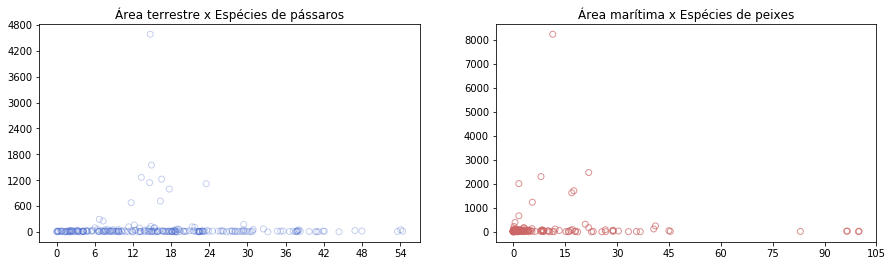

In [62]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15,4))

num_axis = 10

ax1.scatter(df1['Terrestrial protected areas'], df1['Birds'], alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Área terrestre x Espécies de pássaros')

ax1.xaxis.set_major_locator(plt.MaxNLocator(num_axis))
ax1.yaxis.set_major_locator(plt.MaxNLocator(num_axis))


ax2.scatter(df1['Marine protected areas'], df1['Fishes'], alpha=0.7, facecolors='none', color='#cc6666')
ax2.set_title('Área marítima x Espécies de peixes')

ax2.xaxis.set_major_locator(plt.MaxNLocator(num_axis))
ax2.yaxis.set_major_locator(plt.MaxNLocator(num_axis))


pass

Resposta da questão 1:
<br/><br/>
Observandos os gráficos, podemos notar que as espécies ameaçadas de peixes estão concentradas em áreas marítimas com percentual menor de proteção ambiental, e que existem algumas espécies ameaçadas em áreas com mais alto percentual de proteção.
<br/><br/>
As espécies de pássaros ameaçadas de pássaros possuem uma situação similar, onde estão mais concentradas nas áreas terrestres com menor percentual de proteção. Porém, os percentuais de áreas terrestres protegidas são bem menores do que os de áreas marítimas.
<br/><br/>
Outra conclusão é que existem mais espécies de peixes ameaçadas do que espécies de pássaros, e que essa quantidade maior se concentra em áreas menos protegidas.

## Questão 2:
Qual é a relação entre a densidade populacional e a taxa de emissão de gás carbônico na área de transporte?

In [43]:
xls2 = pd.read_html(size_of_economy_data)
xls3 = pd.read_html(carbon_dioxide_emissions_data)
df2 = xls2[0]
df3 = xls3[0]
df2.columns = ['country','population','surface area','population density','gross national income','gross national income per capita','purchasing power','purchasing power per capita','gross domestic product','gross domestic product per capita']
df3.columns = ['country','eletricity and heat production 1990', 'eletricity and heat production 2014','manufacturing industries and construction 1990', 'manufacturing industries and construction 2014','residential buildings and commercial and public services 1990', 'residential buildings and commercial and public services 2014','transport 1990', 'transport 2014','other sectors 1990', 'other sectors 2014']


In [44]:
df2['population'] = pd.to_numeric(df2['population'], errors='coerence')
df2['surface area'] = pd.to_numeric(df2['surface area'], errors='coerence')
df2['population density'] = pd.to_numeric(df2['population density'], errors='coerence')
df2['gross national income'] = pd.to_numeric(df2['gross national income'], errors='coerence')
df2['gross national income per capita'] = pd.to_numeric(df2['gross national income per capita'], errors='coerence')
df2['purchasing power'] = pd.to_numeric(df2['purchasing power'], errors='coerence')
df2['purchasing power per capita'] = pd.to_numeric(df2['purchasing power per capita'], errors='coerence')
df2['gross domestic product'] = pd.to_numeric(df2['gross domestic product'], errors='coerence')
df2['gross domestic product per capita'] = pd.to_numeric(df2['gross domestic product per capita'], errors='coerence')

df2.head()

,country,population,surface area,population density,gross national income,gross national income per capita,purchasing power,purchasing power per capita,gross domestic product,gross domestic product per capita
0,Afghanistan,35.5,652.9,54.0,19.8,560.0,70.6,1990.0,2.7,0.1
1,Albania,2.9,28.8,105.0,12.4,4320.0,37.5,13050.0,3.8,3.9
2,Algeria,41.3,2381.7,17.0,162.8,3940.0,622.1,15060.0,1.6,-0.2
3,American Samoa,0.1,0.2,278.0,NaN,NaN,NaN,NaN,-5.4,-5.5
4,Andorra,0.1,0.5,164.0,NaN,NaN,NaN,NaN,1.9,2.3


In [45]:
df3['eletricity and heat production 1990'] = pd.to_numeric(df3['eletricity and heat production 1990'], errors='coerence')
df3['eletricity and heat production 2014'] = pd.to_numeric(df3['eletricity and heat production 2014'], errors='coerence')
df3['manufacturing industries and construction 1990'] = pd.to_numeric(df3['manufacturing industries and construction 1990'], errors='coerence')
df3['manufacturing industries and construction 2014'] = pd.to_numeric(df3['manufacturing industries and construction 2014'], errors='coerence')
df3['residential buildings and commercial and public services 1990'] = pd.to_numeric(df3['residential buildings and commercial and public services 1990'], errors='coerence')
df3['residential buildings and commercial and public services 2014'] = pd.to_numeric(df3['residential buildings and commercial and public services 2014'], errors='coerence')
df3['transport 1990'] = pd.to_numeric(df3['transport 1990'], errors='coerence')
df3['transport 2014'] = pd.to_numeric(df3['transport 2014'], errors='coerence')
df3['other sectors 1990'] = pd.to_numeric(df3['other sectors 1990'], errors='coerence')
df3['other sectors 2014'] = pd.to_numeric(df3['other sectors 2014'], errors='coerence')
df3.head()

,country,eletricity and heat production 1990,eletricity and heat production 2014,manufacturing industries and construction 1990,manufacturing industries and construction 2014,residential buildings and commercial and public services 1990,residential buildings and commercial and public services 2014,transport 1990,transport 2014,other sectors 1990,other sectors 2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,12.9,2.9,37.7,22.1,5.5,8.5,12.5,60.0,31.4,6.6
2,Algeria,45.1,38.8,11.1,8.3,12.9,15.2,30.9,35.3,0.0,2.4
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df2_df3 = df2.merge(df3, left_on='country', right_on='country', how='left', suffixes=['l', 'r'])
df2_df3.head()

,country,population,surface area,population density,gross national income,gross national income per capita,purchasing power,purchasing power per capita,gross domestic product,gross domestic product per capita,eletricity and heat production 1990,eletricity and heat production 2014,manufacturing industries and construction 1990,manufacturing industries and construction 2014,residential buildings and commercial and public services 1990,residential buildings and commercial and public services 2014,transport 1990,transport 2014,other sectors 1990,other sectors 2014
0,Afghanistan,35.5,652.9,54.0,19.8,560.0,70.6,1990.0,2.7,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2.9,28.8,105.0,12.4,4320.0,37.5,13050.0,3.8,3.9,12.9,2.9,37.7,22.1,5.5,8.5,12.5,60.0,31.4,6.6
2,Algeria,41.3,2381.7,17.0,162.8,3940.0,622.1,15060.0,1.6,-0.2,45.1,38.8,11.1,8.3,12.9,15.2,30.9,35.3,0.0,2.4
3,American Samoa,0.1,0.2,278.0,NaN,NaN,NaN,NaN,-5.4,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0.1,0.5,164.0,NaN,NaN,NaN,NaN,1.9,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


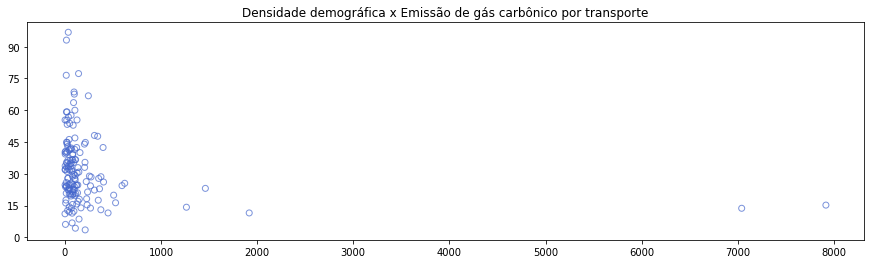

In [47]:
fig, ((ax1)) = plt.subplots(1, figsize=(15,4))

num_axis = 10

ax1.scatter(df2_df3['population density'], df2_df3['transport 2014'], alpha=0.7, facecolors='none', color='#4466cc')
ax1.set_title('Densidade demográfica x Emissão de gás carbônico por transporte')

ax1.xaxis.set_major_locator(plt.MaxNLocator(num_axis))
ax1.yaxis.set_major_locator(plt.MaxNLocator(num_axis))

Resposta da questão 2:
<br/><br/>
A maior concentração de países destinam entre 15% a 45% das suas emissões para o setor de transporte e em geral possuem uma densidade demografica baixa. Mas podemos observar alguns pontos mais afastados, onde os que possuem maior emissão de gás carbônico por transporte possuem menor densidade demográfica. E da mesma forma, os que possuem maior densidade demográfica possuem menor emissão de gás carbonico para o setor de transporte.
<br/><br/>
Vale lembrar que a emissão de gás carbônico está sendo medida em % por setor, ou seja, uma densidade demográfica maior não implica em menos emissão de gás carbônico no setor de transporte, e sim em menos emissão de gás carbônico no sentor de transporte comparando com os outros setores. 

## Questão 3:
Em média, qual é o setor que mais emite gás carbônico em 1990 e 2014? Algum setor aumentou a emissão no decorrer dos anos?

In [48]:
df3.mean()




eletricity and heat production 1990                              35.593919
eletricity and heat production 2014                              39.914935
manufacturing industries and construction 1990                   20.247297
manufacturing industries and construction 2014                   15.576623
residential buildings and commercial and public services 1990    10.602703
residential buildings and commercial and public services 2014     8.546753
transport 1990                                                   27.674324
transport 2014                                                   32.314935
other sectors 1990                                                5.870946
other sectors 2014                                                3.642208
dtype: float64

Resposta da questão 3:
<br/><br/>
Em 1990:<br/>
O setor de produção de eletricidade e calor era o principal emissor de gás carbônico, seguido dos setores de transporte, indústrias de construção e manufatura, residências e serviços públicos ou comerciais e por último outros setores.<br/><br/>
Em 2014:<br/>
Continua sendo o setor de produção de eletricidade e calor era o principal emissor de gás carbônico, seguido dos setores de transporte, indústrias de construção e manufatura, residências e serviços públicos ou comerciais e por último outros
<br/><br/>
Os setores de transporte e de produção de eletricidade e calor foram os únicos que aumentaram a emissão de gás carbônico no decorrer dos anos, o que faz sentido com a crescente demanda de eletricidade  e quantidade de carros nas ruas.

## Questão 4:
O acesso à eletricidade é maior na área rural ou na área urbana?

In [54]:
xls4 = pd.read_html(sustainable_energy_for_all_data)
df4 = xls4[0]
df4.columns = ['country','access to eletricity 2000','access to eletricity 2016','access to eletricity (urban population) 2016','access to eletricity (rural population) 2016','access to clean fuels and technologies for cooking 2000','access to clean fuels and technologies for cooking 2016','renewable energy consumption 2000','renewable energy consumption 2015','renewable electricity output 2000','renewable electricity output 2015']

df4['access to eletricity 2000'] = pd.to_numeric(df4['access to eletricity 2000'], errors='coerence')
df4['access to eletricity 2016'] = pd.to_numeric(df4['access to eletricity 2016'], errors='coerence')
df4['access to eletricity (urban population) 2016'] = pd.to_numeric(df4['access to eletricity (urban population) 2016'], errors='coerence')
df4['access to eletricity (rural population) 2016'] = pd.to_numeric(df4['access to eletricity (rural population) 2016'], errors='coerence')
df4['access to clean fuels and technologies for cooking 2000'] = pd.to_numeric(df4['access to clean fuels and technologies for cooking 2000'], errors='coerence')
df4['access to clean fuels and technologies for cooking 2016'] = pd.to_numeric(df4['access to clean fuels and technologies for cooking 2016'], errors='coerence')
df4['renewable energy consumption 2000'] = pd.to_numeric(df4['renewable energy consumption 2000'], errors='coerence')
df4['renewable energy consumption 2015'] = pd.to_numeric(df4['renewable energy consumption 2015'], errors='coerence')
df4['renewable electricity output 2000'] = pd.to_numeric(df4['renewable electricity output 2000'], errors='coerence')
df4['renewable electricity output 2015'] = pd.to_numeric(df4['renewable electricity output 2015'], errors='coerence')
df4.head()



,country,access to eletricity 2000,access to eletricity 2016,access to eletricity (urban population) 2016,access to eletricity (rural population) 2016,access to clean fuels and technologies for cooking 2000,access to clean fuels and technologies for cooking 2016,renewable energy consumption 2000,renewable energy consumption 2015,renewable electricity output 2000,renewable electricity output 2015
0,Afghanistan,1.0,84.1,98.0,79.0,8.8,32.4,54.2,18.4,75.0,86.1
1,Albania,100.0,100.0,100.0,100.0,39.8,77.4,41.4,38.6,96.1,100.0
2,Algeria,99.0,99.4,99.6,99.0,86.5,92.6,0.4,0.1,0.2,0.3
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.9,0.0,0.9
4,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,14.9,19.7,100.0,86.1


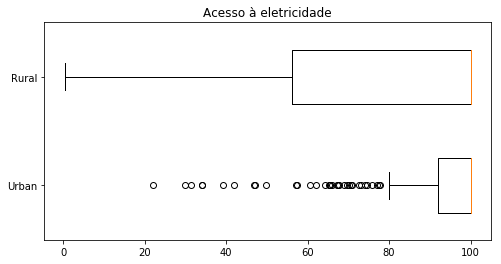

In [55]:
fig, ax = plt.subplots(figsize=(8,4))

urban = df4['access to eletricity (urban population) 2016'].values
filtered_urban = urban[~np.isnan(urban)]

rural = df4['access to eletricity (rural population) 2016'].values
filtered_rural = rural[~np.isnan(rural)]

ax.boxplot([filtered_urban, filtered_rural], widths=0.5, labels=['Urban', 'Rural'], vert=False)
ax.set_title('Acesso à eletricidade')

pass

Resposta da questão 4:
<br/><br/>
Como podemos ver no gráfico boxplot, a área urbana tende a fornercer mais acesso à eletricidade, em uma faixa de 90% a 100%, mas com diversos pontos outliers, enquanto a área rural fornece em uma faixa de 60% a 100%, porém sem nenhum outlier. Isto quer dizer que é garantido pelo menos 60% das áreas rurais terem acesso à eletricidade, enquanto apesar da faixa de pelo menos 90% das áreas urbanas terem acesso à eletricidade, alguns países podem ter, por exemplo, 20% da área urbana sem acesso à eletricidade.

## Questão 5:
Levando em consideração o aumento do uso de energias renováveis, houve uma diminuição significativa do consumo final de energia entre os anos 2000 e 2015?

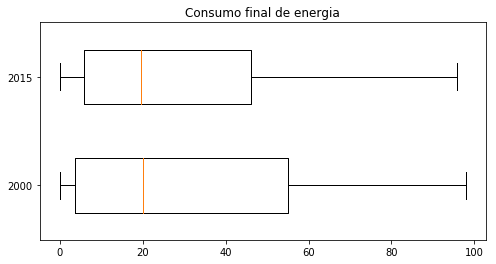

In [61]:
fig, ax = plt.subplots(figsize=(8,4))

urban = df4['renewable energy consumption 2000'].values
filtered_urban = urban[~np.isnan(urban)]

rural = df4['renewable energy consumption 2015'].values
filtered_rural = rural[~np.isnan(rural)]

ax.boxplot([filtered_urban, filtered_rural], widths=0.5, labels=['2000', '2015'], vert=False)
ax.set_title('Consumo final de energia')

pass


In [57]:
df4.mean()

access to eletricity 2000                                  73.795964
access to eletricity 2016                                  83.750667
access to eletricity (urban population) 2016               92.100889
access to eletricity (rural population) 2016               76.995370
access to clean fuels and technologies for cooking 2000    55.710000
access to clean fuels and technologies for cooking 2016    64.860500
renewable energy consumption 2000                          31.759174
renewable energy consumption 2015                          29.396847
renewable electricity output 2000                          28.759735
renewable electricity output 2015                          30.628319
dtype: float64

Resposta da questão 5:
<br/><br/>
É possível observar no gráfico boxplot que houve uma diminuição significativa do limite superior do gráfico comparando os anos de 2000 e 2015, apesar da mediana se manter. Isto quer dizer que em alguns países, houve a diminuição na parcela de energia renovável utilizada, o que é o oposto do esperado.
<br/><br/>
Outra forma de observar esta diminuição é vendo a média dos valores das colunas, que diminuiu de 31,75% para 29,39%. É uma diminuição pequena no geral, mas pode ser grande em alguns países específicos.

## Questão 6:
Qual é a relação entre a percentagem de emissão de dióxido de carbono vinda do setor de produção de eletricidade e calor com o aumento da geração de energia renovável?

In [58]:
df4_df3 = df4.merge(df3, left_on='country', right_on='country', how='left', suffixes=['l', 'r'])
df4_df3.head()

,country,access to eletricity 2000,access to eletricity 2016,access to eletricity (urban population) 2016,access to eletricity (rural population) 2016,access to clean fuels and technologies for cooking 2000,access to clean fuels and technologies for cooking 2016,renewable energy consumption 2000,renewable energy consumption 2015,renewable electricity output 2000,renewable electricity output 2015,eletricity and heat production 1990,eletricity and heat production 2014,manufacturing industries and construction 1990,manufacturing industries and construction 2014,residential buildings and commercial and public services 1990,residential buildings and commercial and public services 2014,transport 1990,transport 2014,other sectors 1990,other sectors 2014
0,Afghanistan,1.0,84.1,98.0,79.0,8.8,32.4,54.2,18.4,75.0,86.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,100.0,100.0,100.0,100.0,39.8,77.4,41.4,38.6,96.1,100.0,12.9,2.9,37.7,22.1,5.5,8.5,12.5,60.0,31.4,6.6
2,Algeria,99.0,99.4,99.6,99.0,86.5,92.6,0.4,0.1,0.2,0.3,45.1,38.8,11.1,8.3,12.9,15.2,30.9,35.3,0.0,2.4
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.9,0.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,14.9,19.7,100.0,86.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, '% da emissão de CO2 que é do setor elétrico')

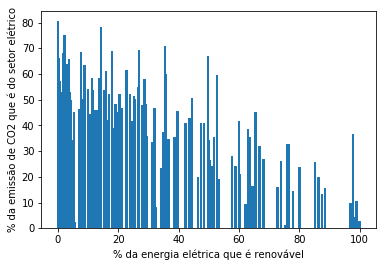

In [59]:
plt.bar(df4_df3['renewable electricity output 2015'], df4_df3['eletricity and heat production 2014'])
plt.xlabel('% da energia elétrica que é renovável')
plt.ylabel('% da emissão de CO2 que é do setor elétrico')

Resposta da questão 6:
<br/><br/>
O gráfico em barras é decrescente, indicando que quanto maior é a porcentagem de energia elétrica gerada for de energia renovável, menor será a porcertagem de emissão de dióxido de carbono gerado pelo setor de produção de eletricidade e calor.
<br/><br/>
Esta indicação faz sentido, levando em consideração que grande parte da emissão de dióxido de carbono gerado pela indústria elétrica vem de fontes como termoelétrica, petróleo e queima de lixo, enquanto a emissão de dióxido de carbono por fontes de energina renováveis como eólica, hidroelétrica e solar são muito menores ou nulas.

## Questão 7:
Quais são os países com melhor acesso a combustíveis limpos e tecnologias para cozinhar?

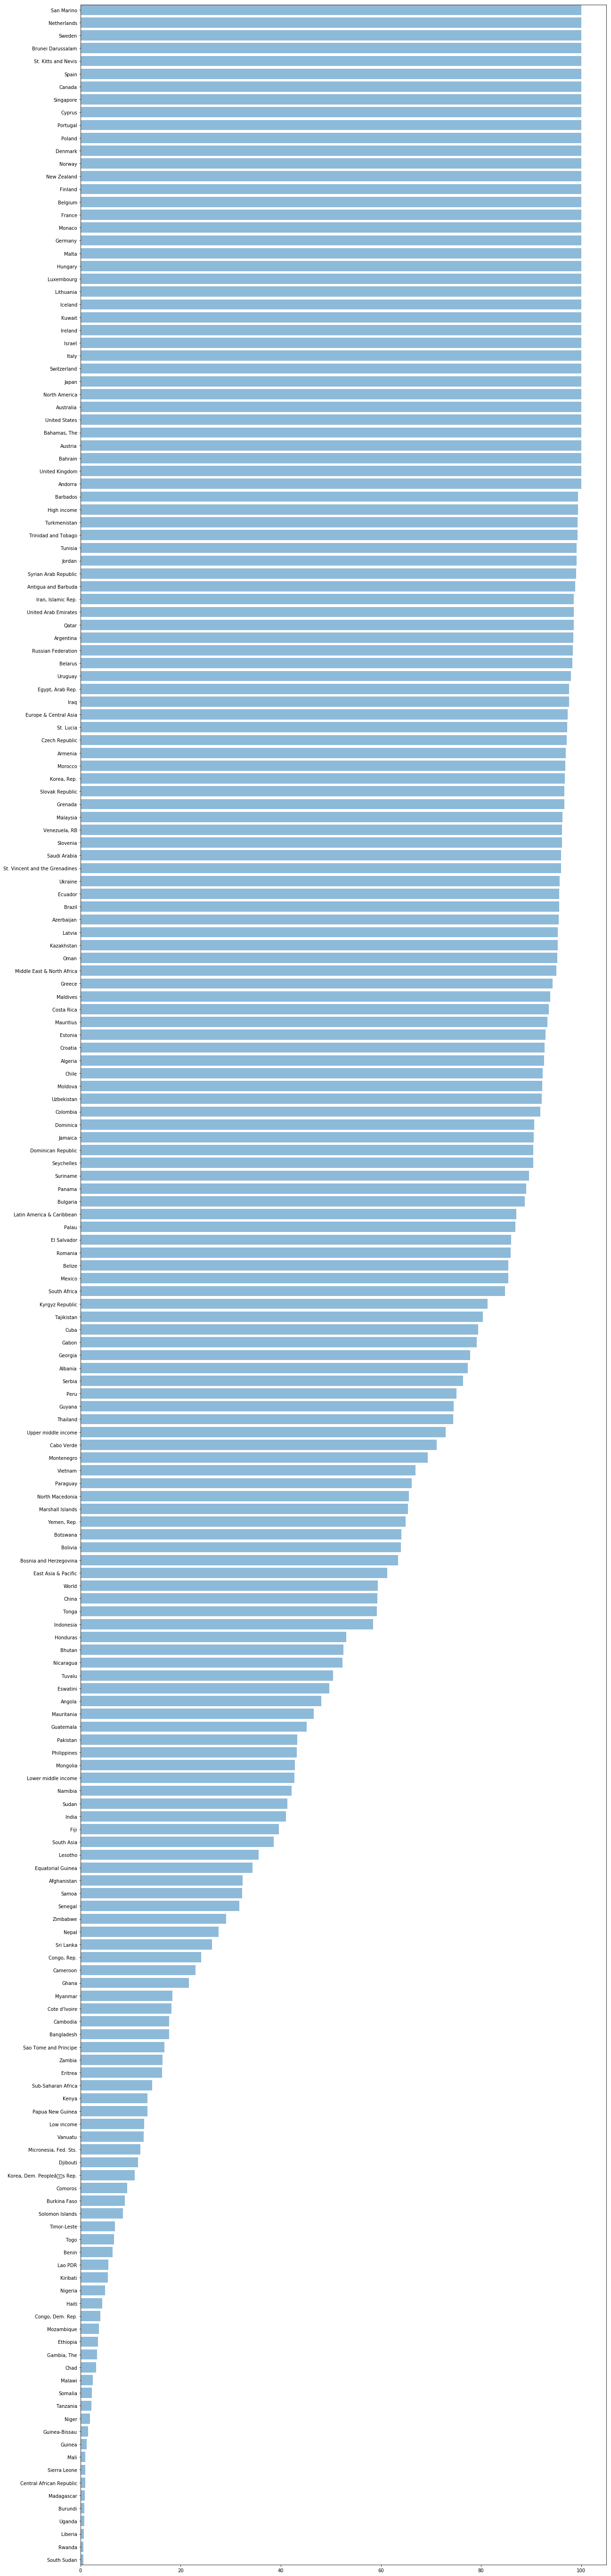

In [60]:
fig, ax = plt.subplots(figsize=(20,100))
df4_df3.sort_values('access to clean fuels and technologies for cooking 2016',inplace=True)
plt.barh(df4_df3['country'], df4_df3['access to clean fuels and technologies for cooking 2016'], align='center', alpha=0.5)
plt.margins(y=0)

Resposta da questão 7:
<br/><br/>
Basta observar os países mais próximos de 100% no gráfico em barras. Por exemplo, San Marino, Netherlands, Sweden, Brunei Darussalam, St. Kitts and Nevis, Spain, Canada...

## Questão 8:
Qual setor tem o maior percentual de consumo de água?

In [66]:
xls5 = pd.read_html(freshwater_data)
df5 = xls5[0]
df5.columns = ['country','Internal renewable freshwater resources (flows)','Internal renewable freshwater resources (per capita)','Annual freshwater withdrawals (billion)', 'Annual freshwater withdrawals (% of internal resources)', 'Annual freshwater withdrawals (% for agriculture)', 'Annual freshwater withdrawals (% for industy)', 'Annual freshwater withdrawals (% for domestic)','Water productivity','People using at least basic drinking water services (urban)', 'People using at least basic drinking water services (rural)']

df5['Internal renewable freshwater resources (flows)'] = pd.to_numeric(df5['Internal renewable freshwater resources (flows)'], errors='coerence')
df5['Internal renewable freshwater resources (per capita)'] = pd.to_numeric(df5['Internal renewable freshwater resources (per capita)'], errors='coerence')
df5['Annual freshwater withdrawals (billion)'] = pd.to_numeric(df5['Annual freshwater withdrawals (billion)'], errors='coerence')
df5['Annual freshwater withdrawals (% of internal resources)'] = pd.to_numeric(df5['Annual freshwater withdrawals (% of internal resources)'], errors='coerence')
df5['Annual freshwater withdrawals (% for agriculture)'] = pd.to_numeric(df5['Annual freshwater withdrawals (% for agriculture)'], errors='coerence')
df5['Annual freshwater withdrawals (% for industy)'] = pd.to_numeric(df5['Annual freshwater withdrawals (% for industy)'], errors='coerence')
df5['Annual freshwater withdrawals (% for domestic)'] = pd.to_numeric(df5['Annual freshwater withdrawals (% for domestic)'], errors='coerence')
df5['Water productivity'] = pd.to_numeric(df5['Water productivity'], errors='coerence')
df5['People using at least basic drinking water services (urban)'] = pd.to_numeric(df5['People using at least basic drinking water services (urban)'], errors='coerence')
df5['People using at least basic drinking water services (rural)'] = pd.to_numeric(df5['People using at least basic drinking water services (rural)'], errors='coerence')

df5.head()

,country,Internal renewable freshwater resources (flows),Internal renewable freshwater resources (per capita),Annual freshwater withdrawals (billion),Annual freshwater withdrawals (% of internal resources),Annual freshwater withdrawals (% for agriculture),Annual freshwater withdrawals (% for industy),Annual freshwater withdrawals (% for domestic),Water productivity,People using at least basic drinking water services (urban),People using at least basic drinking water services (rural)
0,Afghanistan,47.2,1439.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,53.5
1,Albania,26.9,9311.0,1.3,4.9,39.0,18.0,43.0,7.0,92.5,89.9
2,Algeria,11.3,288.0,7.8,69.4,59.0,5.0,36.0,22.0,95.4,88.7
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0.3,3984.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0


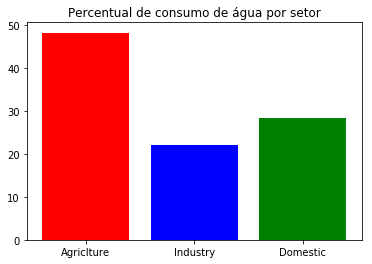

In [67]:
freshwater_percs = df5.mean()[4:7]
freshwater_percs.keys()
freshwater_percs.keys = pd.Index(['Agriclture', 'Industry', 'Domestic'])

plt.bar(freshwater_percs.keys, freshwater_percs.values, color=['red', 'blue', 'green'])
plt.title('Percentual de consumo de água por setor')
plt.show()

Resposta da questão 8:
<br/><br/>
A área da agricultura é a que tem o maior percentual de consumo de água

## Questão 9:
Qual é a relação entre a extração anual de água potável com os recursos renováveis internos de água potável?

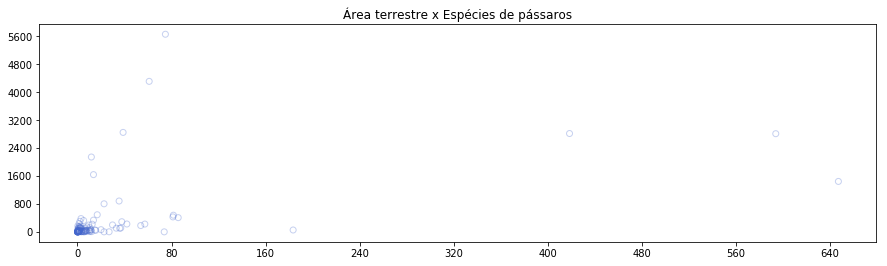

In [81]:
fig, ((ax1)) = plt.subplots(1, figsize=(15,4))

num_axis = 10

ax1.scatter(df5['Annual freshwater withdrawals (billion)'],df5['Internal renewable freshwater resources (flows)'], alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Área terrestre x Espécies de pássaros')

ax1.xaxis.set_major_locator(plt.MaxNLocator(num_axis))
ax1.yaxis.set_major_locator(plt.MaxNLocator(num_axis))

pass

Resposta da questão 9:
<br/><br/>
A maior concentração de países possui menor extração de água potável e menos recursos internos renováveis de água potável. Porém, mesmo que pouco, é possível observar que existem uma tendência de que países com mais recursos internos renováveis realizarem menos extração de água potável, e da mesma forma forma, os países com menos recursos internos renováveis realizarem mais extração de água potável.

## Questão 10:
Qual conclusão podemos chegar ao comparar o acesso à água potável nas áreas urbanas e rurais?

People using at least basic drinking water services (urban)    93.358947
People using at least basic drinking water services (rural)    78.791848
dtype: float64


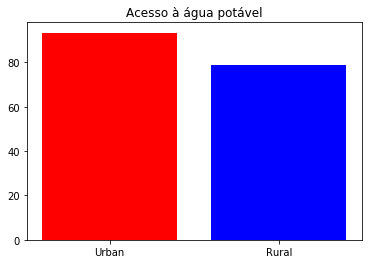

In [89]:
freshwater_percs = df5.mean()[8:10]
freshwater_percs.keys()
freshwater_percs.keys = pd.Index(['Urban', 'Rural'])

print(freshwater_percs)

plt.bar(freshwater_percs.keys, freshwater_percs.values, color=['red', 'blue'])
plt.title('Acesso à água potável')
plt.show()

Resposta da questão 10:
<br/><br/>
Observando o gráfico em barras, podemos notar que o acesso à água potável é maior em áreas urbanas do que em áreas rurais.